# K-Means Clustering in Python

In [1]:
#Source: https://realpython.com/k-means-clustering-python/

In [2]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
 features, true_labels = make_blobs(n_samples=200, centers=3, cluster_std=2.75, random_state=42)

In [4]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [5]:
true_labels[:5]

array([1, 0, 2, 2, 2])

In [6]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [7]:
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [8]:
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [9]:
kmeans.inertia_

74.57960106819854

In [10]:
kmeans.cluster_centers_

array([[ 1.19539276,  0.13158148],
       [-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732]])

In [11]:
kmeans.n_iter_

6

In [12]:
kmeans.labels_[:5]

array([0, 1, 2, 2, 2])

In [13]:
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42, }

In [14]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

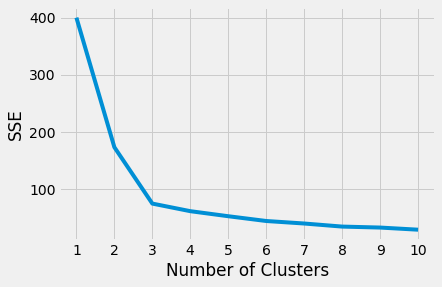

In [15]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [16]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

In [17]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
     kmeans.fit(scaled_features)
     score = silhouette_score(scaled_features, kmeans.labels_)
     silhouette_coefficients.append(score)

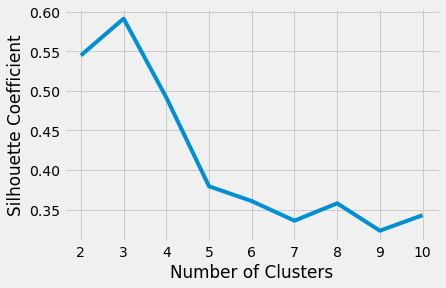

In [18]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [19]:
#Evaluating Clustering Performance Using Advanced Techniques
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score


features, true_labels = make_moons(n_samples=250, noise=0.05, random_state=42)
scaled_features = scaler.fit_transform(features)

# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)
dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_).round (2)

In [20]:
kmeans_silhouette

0.5

In [21]:
dbscan_silhouette

0.38

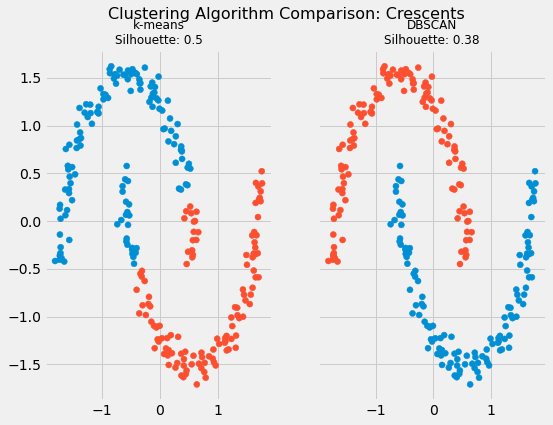

In [22]:
# Plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharex=True, sharey=True)
fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
fte_colors = {0: "#008fd5",1: "#fc4f30",}
# The k-means plot
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=km_colors)
ax1.set_title(f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12})

# The dbscan plot
db_colors = [fte_colors[label] for label in dbscan.labels_]
ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], c=db_colors)
ax2.set_title(f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12})
plt.show()

In [23]:
ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)

In [24]:
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)

In [25]:
round(ari_kmeans, 2)

0.47

In [26]:
round(ari_dbscan, 2)

1.0

In [27]:
#Building a K-Means Clustering Pipeline

import tarfile
import urllib

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [28]:
datafile = "TCGA-PANCAN-HiSeq-801x20531/data.csv"
labels_file = "TCGA-PANCAN-HiSeq-801x20531/labels.csv"

data = np.genfromtxt(datafile, delimiter=",", usecols=range(1, 20532), skip_header=1)

true_label_names = np.genfromtxt(labels_file,delimiter=",",usecols=(1,),skip_header=1,dtype="str")

In [29]:
data[:5, :3]

array([[0.        , 2.01720929, 3.26552691],
       [0.        , 0.59273209, 1.58842082],
       [0.        , 3.51175898, 4.32719872],
       [0.        , 3.66361787, 4.50764878],
       [0.        , 2.65574107, 2.82154696]])

In [30]:
true_label_names[:5]

array(['PRAD', 'LUAD', 'PRAD', 'PRAD', 'BRCA'], dtype='<U4')

In [31]:
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(true_label_names)
true_labels[:5]

array([4, 3, 4, 4, 0], dtype=int64)

In [32]:
n_clusters = len(label_encoder.classes_)
label_encoder.classes_

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype='<U4')

In [33]:
preprocessor = Pipeline([("scaler", MinMaxScaler()),("pca", PCA(n_components=2, random_state=42))])

In [34]:
clusterer = Pipeline([("kmeans",KMeans(n_clusters=n_clusters,init="k-means++",n_init=50,max_iter=500,random_state=42,),),])

In [35]:
pipe = Pipeline([("preprocessor", preprocessor),("clusterer", clusterer)])

In [36]:
pipe.fit(data)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

In [37]:
preprocessed_data = pipe["preprocessor"].transform(data)
predicted_labels = pipe["clusterer"]["kmeans"].labels_
silhouette_score(preprocessed_data, predicted_labels)

0.51187755284503

In [38]:
adjusted_rand_score(true_labels, predicted_labels)

0.722276752060253

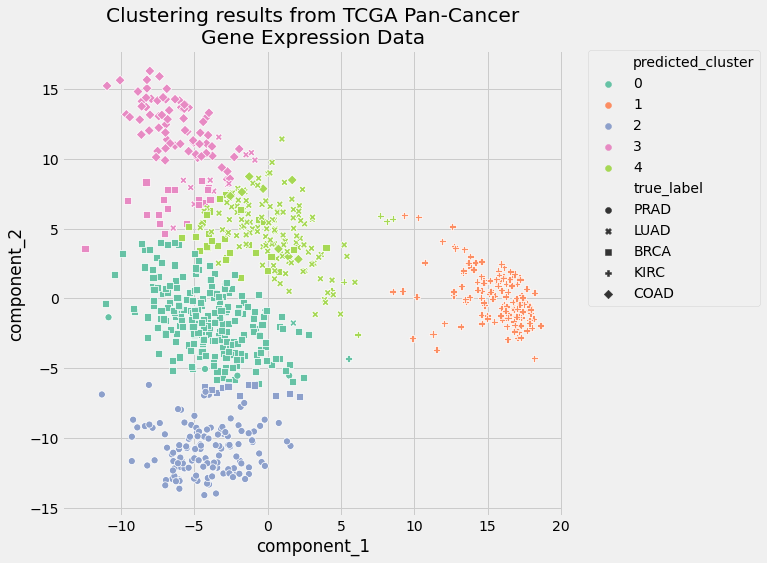

In [39]:
pcadf = pd.DataFrame(pipe["preprocessor"].transform(data),columns=["component_1", "component_2"],)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot("component_1","component_2",s=50,data=pcadf,hue="predicted_cluster",style="true_label",palette="Set2")

scat.set_title("Clustering results from TCGA Pan-Cancer\nGene Expression Data")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

In [40]:
#Tuning a K-Means Clustering Pipeline
# Empty lists to hold evaluation metrics
silhouette_scores = []
ari_scores = []
for n in range(2, 11):
     # This set the number of components for pca,
     # but leaves other steps unchanged
     pipe["preprocessor"]["pca"].n_components = n
     pipe.fit(data)

     silhouette_coef = silhouette_score(pipe["preprocessor"].transform(data),pipe["clusterer"]["kmeans"].labels_)

     ari = adjusted_rand_score(true_labels,pipe["clusterer"]["kmeans"].labels_)        

     # Add metrics to their lists
     silhouette_scores.append(silhouette_coef)
     ari_scores.append(ari)


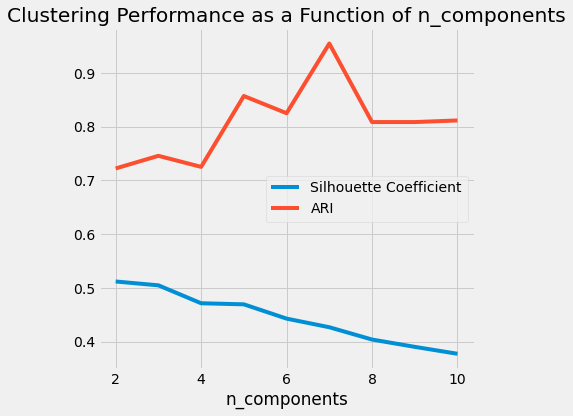

In [41]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(6, 6))
plt.plot(range(2, 11),silhouette_scores,c="#008fd5",label="Silhouette Coefficient")
plt.plot(range(2, 11), ari_scores, c="#fc4f30", label="ARI")

plt.xlabel("n_components")
plt.legend()
plt.title("Clustering Performance as a Function of n_components")
plt.tight_layout()
plt.show()

# K-Nearest Meighbors

In [42]:
#source: https://www.askpython.com/python/examples/k-nearest-neighbors-from-scratch

In [43]:
#Importing the required modules
import numpy as np
from scipy.stats import mode
 
#Euclidean Distance
def eucledian(p1,p2):
    dist = np.sqrt(np.sum((p1-p2)**2))
    return dist
 
#Function to calculate KNN
def predict(x_train, y , x_input, k):
    op_labels = []
     
    #Loop through the Datapoints to be classified
    for item in x_input: 
         
        #Array to store distances
        point_dist = []
         
        #Loop through each training Data
        for j in range(len(x_train)): 
            distances = eucledian(np.array(x_train[j,:]) , item) 
            #Calculating the distance
            point_dist.append(distances) 
        point_dist = np.array(point_dist) 
         
        #Sorting the array while preserving the index
        #Keeping the first K datapoints
        dist = np.argsort(point_dist)[:k] 
         
        #Labels of the K datapoints from above
        labels = y[dist]
         
        #Majority voting
        lab = mode(labels) 
        lab = lab.mode[0]
        op_labels.append(lab)
 
    return op_labels

In [44]:
#Importing the required modules
#Importing required modules
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from numpy.random import randint
 
#Loading the Data
iris= load_iris()
 
# Store features matrix in X
X= iris.data
#Store target vector in 
y= iris.target
 
 
#Creating the training Data
train_idx = xxx = randint(0,150,100)
X_train = X[train_idx]
y_train = y[train_idx]
 
#Creating the testing Data
test_idx = xxx = randint(0,150,50) #taking 50 random samples
X_test = X[test_idx]
y_test = y[test_idx]
 
#Applying our function 
y_pred = predict(X_train,y_train,X_test , 7)
 
#Checking the accuracy
accuracy_score(y_test, y_pred)

0.9